# Traveling Salesman Problem (TSP) Project
# Defining distances matrix (An Upper triangular matrix):

In [46]:
#Force reset all variables

%reset -f 
%matplotlib inline

import time
import math
import numpy as np
from sys import maxsize 
from itertools import permutations
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt

def Distances_Matrix(x,y):
    D=np.zeros((v,v))
    for i in range(v):
        for j in range(v):
            if j>i:
                D[i,j]=int(math.sqrt((x[i]-x[j])**2 + (y[i]-y[j])**2)+.5)
                D[j,i]=D[i,j]
    return D
def calculate_min_spanning_tree_length(x, y):
    # Create a graph
    G = nx.Graph()

    # Add nodes to the graph
    for i in range(len(x)):
        G.add_node(i, pos=(x[i], y[i]))

    # Add edges based on the Euclidean distance between points
    for i in range(len(x)):
        for j in range(i + 1, len(x)):
            distance = ((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2) ** 0.5
            G.add_edge(i, j, weight=distance)

    # Calculate the minimum spanning tree
    min_spanning_tree = nx.minimum_spanning_tree(G)

    # Calculate the length of the minimum spanning tree
    length = sum([min_spanning_tree[u][v]['weight'] for u, v in min_spanning_tree.edges()])

    return length

def Dist_to_center(x,y, x_bar, y_bar):
    dcent = []
    for i in range(v):
        dcent.append(int(math.sqrt((x[i]-x_bar)**2 + (y[i]-y_bar)**2)+.5))
    return dcent

def Display_Verticies(x,y,x_bar, y_bar):
    plt.figure()
    plt.scatter(x,y, label='Cities')
    plt.scatter(x_bar,y_bar, color = 'r', label = 'Centroid')
    plt.grid()
    plt.legend()
    plt.show()
    
def connectpoints(x, y, indx, T):
    plt.figure()
    for j in range(v):
        x1, x2 = x[indx[j-1]], x[indx[j]]
        y1, y2 = y[indx[j-1]], y[indx[j]]
        plt.plot([x1, x2], [y1, y2], 'k-')
    plt.scatter(x,y)
    plt.scatter(x_bar,y_bar, color = 'r')
    plt.grid()
    plt.title(T)
    plt.show()

    
#Brute force Algorithm function   
    
def travellingSalesmanProblem(graph, s): 
    t3 = time.time() 
    # store all vertex apart from source vertex 
    vertex = [] 
    for i in range(v): 
        if i != s: 
            vertex.append(i) 
    mypath=()
    # store minimum weight Hamiltonian Cycle 
    min_path = maxsize 
    next_permutation=permutations(vertex)
    for i in next_permutation:
        # store current Path weight(cost) 
        current_pathweight = 0

        # compute current path weight 
        k = s 
        for j in i: 
            current_pathweight += graph[k][j] 
            k = j 
        current_pathweight += graph[k][s] 

        # update minimum 
        if current_pathweight <= min_path:
            mypath=i
        min_path = min(min_path, current_pathweight)


    mypath=list(mypath)
    mypath.insert(s,s)
    t4=time.time()
    timecost = t4 - t3
    return min_path, mypath, timecost
    
    
    
    
    
#Minimum spaning Tree Definition
def calculate_min_spanning_tree_length2(x, y):
    # Create a graph
    t1 = time.time()
    G = nx.Graph()

    # Add nodes to the graph
    for i in range(len(x)):
        G.add_node(i, pos=(x[i], y[i]))

    # Add edges based on the Euclidean distance between points
    for i in range(len(x)):
        for j in range(i + 1, len(x)):
            distance = ((x[i] - x[j]) ** 2 + (y[i] - y[j]) ** 2) ** 0.5
            G.add_edge(i, j, weight=distance)

    # Calculate the minimum spanning tree
    min_spanning_tree = nx.minimum_spanning_tree(G)

    # Calculate the length of the minimum spanning tree
    length = sum([min_spanning_tree[u][v]['weight'] for u, v in min_spanning_tree.edges()])
    t2=time.time()
    timecost = t2-t1
    return length, timecost, G, min_spanning_tree


# Draw the graph of the MST
def Draw_Network(G):
    pos = nx.get_node_attributes(G, 'pos')
    min_spanning_tree = nx.minimum_spanning_tree(G)
    nx.draw_networkx_nodes(G, pos, node_size=20)
    nx.draw_networkx_edges(G, pos, edgelist=min_spanning_tree.edges(), width=1.5, edge_color='gray')
    #nx.draw_networkx_labels(G, pos, font_size=10, font_family='sans-serif')
    plt.title('Minimum Spanning Tree')
    #plt.axis('on')
    plt.grid()
    plt.show()
    
    
# Define the Nearest Neighbor Algorithm
def nearest_neighbor(Dist):
    t5=time.time()
    D = Dist.copy()
    routelist=[]
    n = len(D[0,:])
    currentStop = 0
    routeList = [0]
    for _i in range(n-1):
        D[:,currentStop] = v**2 *100000 # Set column of visited stop to very large number
        currentStop = np.argmin(D[currentStop,:])
        routelist.append(currentStop)
    routelist.insert(0,0)
    
    #Calculate the distance traveled
    summ8=0
    i=-1
    while i < len(routelist)-1:
        summ8+=Dist[routelist[i], routelist[i+1]]
        i+=1
    t6=time.time()
    timecost = t6-t5
    return summ8, timecost, routelist

# My Modification to the Nearest neighbor Algorithm
def NearestN_centric(x, y):
    visit = [m]
    count=0
    ind1=0
    ind2=0
    t5=time.time()
    for i in range(v-1):
        min1=np.inf
        min2=np.inf
        for j in range(v):
            if j not in visit:
                if D[visit[-1], j]<min1:
                    min1 =D[visit[-1], j]
                    ind1=j
                elif D[visit[-1], j]<min2:
                    min2 = D[visit[-1], j]
                    ind2 = j
        if dcent[ind1]>dcent[ind2]:
            visit.append(ind1)
        else:
            visit.append(ind1)
    
    #Calculate the distance traveled
    summ7=0
    i=-1
    while i < len(visit)-1:
        summ7+=D[visit[i], visit[i+1]]
        i+=1
    t6=time.time()
    timecost = t6-t5
    return summ7, timecost, visit

#Another modification to the Nearest neighbor algorithm:
# Define the Nearest Neighbor Algorithm
def nearest_neighbor_mod(Dist):
    t5=time.time()
    D = Dist.copy()
    k=Dist.copy()
    for j in range(v):
        for i in range(v):
            k[i, j] = (D[i,j]**2 - (dcent[j]**2)/v)/v**2
    routelist=[]
    n = len(D[0,:])
    currentStop = 0
    routeList = [0]
    for i in range(n-1):
        k[:,currentStop] = v**2 *100000 # Set column of visited stop to very large number
        currentStop = np.argmin(k[currentStop,:])
        routelist.append(currentStop)
    routelist.insert(0,0)
    
    #Calculate the distance traveled
    summ8=0
    i=-1
    while i < len(routelist)-1:
        summ8+=Dist[routelist[i], routelist[i+1]]
        i+=1
    t6=time.time()
    timecost = t6-t5
    return summ8, timecost, routelist



#Christofides Algorithm ##Important
def Christofides(x,y):
    t9=time.time()
    #Identify the odd degree Nodes:
    odd_degree_nodes = [i for i in T.nodes if T.degree(i) %2]
    my_pos = { i : ( x[i], y[i] ) for i in range(v) }
    node_colors = [ T.degree(i) % 2 for i in T.nodes ]
    #nx.draw(T, pos=my_pos, node_color=node_colors, node_size=20)


    # find a minimum-cost perfect matching over the odd-degree nodes
    for i,j in G.edges:
        G.edges[i,j]['neg_length'] = - G.edges[i,j]['weight']

    matching = nx.max_weight_matching( G.subgraph(odd_degree_nodes), maxcardinality=True, weight='neg_length')

    # create a multigraph with edge_set = (spanning tree edges) + (matching)
    M = nx.MultiGraph()

    M.add_nodes_from(range(v))

    M.add_edges_from(T.edges())
    M.add_edges_from(matching)

    

    # find an Eulerian cycle of the multigraph
    initial_tour = list ( nx.eulerian_circuit(M,source=0) )


    # take shortcuts (avoid repeated nodes)
    tour = [ 0 ]
    for (i,j) in initial_tour:
        if j not in tour:
            tour.append(j)



    #Calculating the Tour weight and comparing it to the MST:
    summ0=0
    i=-1
    while i < len(tour)-1:
        summ0+=D[tour[i], tour[i+1]]
        i+=1
    distCrhist = summ0
    t10 = time.time()
    timecost = t10-t9
    return distCrhist, timecost, tour



#Saving x and y data to separate files for the Anealing simulator:
def savex(x):
    filename = ('x.txt')
    f = open(filename, 'w')
    with open('x.txt', 'w') as f:
        f.write('0')
        f.write('\n')
        for line in x:
            f.write(str(line))
            f.write('\n')
    f.close()
def savey(y):
    filename = ('y.txt')
    f = open(filename, 'w')
    with open('y.txt', 'w') as f:
        f.write('0')
        f.write('\n')
        for line in y:
            f.write(str(line))
            f.write('\n')
    f.close()
def savef(y, name):
    filename = name
    f = open(filename, 'w')
    with open(name, 'w') as f:
        f.write('0')
        f.write('\n')
        for line in y:
            f.write(str(line))
            f.write('\n')
    f.close()
def readanealing(name):
    filename = name
    ys=[]

    file = open(name, 'r')
    read = file.readline()
    for line in file:
        ys.append((line.strip()))
    file.close()
    return ys
def DistTour(visit):
    summ7=0
    i=-1
    while i < len(visit)-1:
        summ7+=D[visit[i], visit[i+1]]
        i+=1
    return summ7

# Add number of verticies and let RNG draw some verticies for you!

In [47]:
v=100
x=[]
y=[]
for i in range(v):
    x.append(int(200*np.random.rand()+.5))
    y.append(round(200*np.random.rand()+.5))
    
#Saving x and y into files
savex(x)
savey(y)
#Evaluating distances matrix
D = Distances_Matrix(x,y)
#finding the centroid
x_bar = np.average(x)
y_bar = np.average(y)
#evaluateing distances_to_centroid list
dcent = Dist_to_center(x,y, x_bar, y_bar)
#finding the index of the farthest point to the centroid
m=dcent.index(max(dcent))

# Visualize the points:

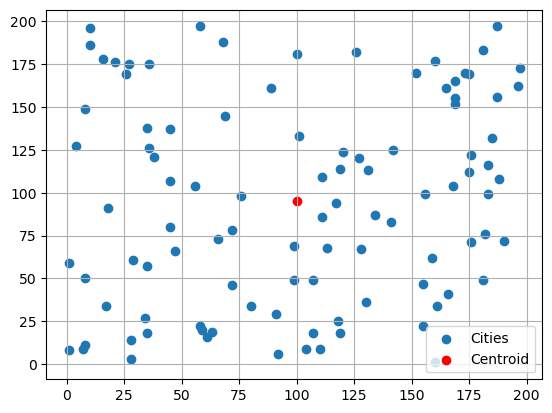

In [48]:
Display_Verticies(x,y,x_bar, y_bar)

# Brute Force abbroach
### (Only if the number of nodes less than 13)

Length of the minimum graph using exact method =  687.0
Order of points visited = [0, 6, 8, 4, 3, 1, 9, 5, 7, 2]
time cost to calculate minimum lenght using brute force = 2.027 seconds


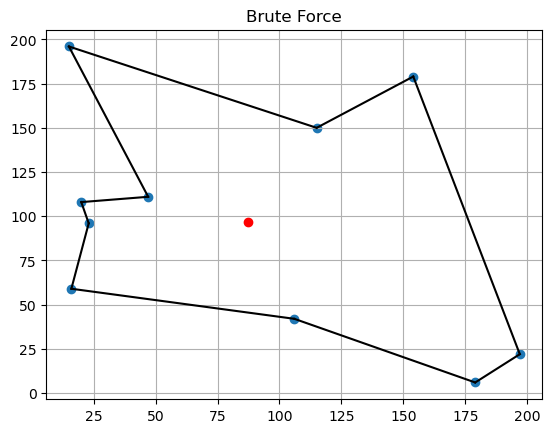

In [38]:
#The next if condition is to make sure not to burn the processor with the Brute force method if number of verticies > 13
if v<13:
    s = 0 #starting point
    min_path, mypath2, timecost=travellingSalesmanProblem(D, s)
    
    print('Length of the minimum graph using exact method = ', min_path)
    print('Order of points visited =', mypath2)
    print('time cost to calculate minimum lenght using brute force = %.3f seconds' %(timecost))
    connectpoints(x, y, mypath2, 'Brute Force')

# Calculating the Minimum Spaning Tree

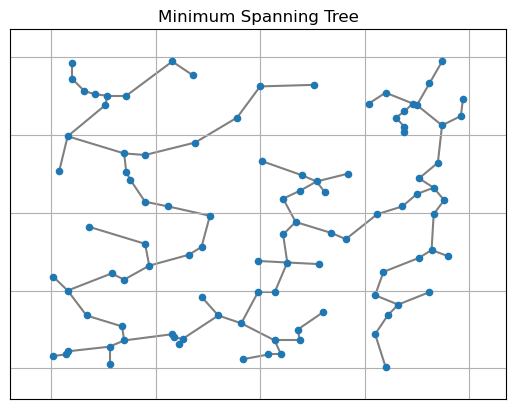

Length of the minimum spanning tree: 1362.5136153212284
Time cost to calculat the lenght of the minimum spaning tree = 0.046 seconds


In [49]:
min_spanning_tree_length , timecost2, G, T= calculate_min_spanning_tree_length2(x, y)
Draw_Network(G)
print("Length of the minimum spanning tree:", min_spanning_tree_length)
print('Time cost to calculat the lenght of the minimum spaning tree = %.3f seconds'%(timecost2))

# Nearest Neighbor (NN) Algorithm:

1768.0


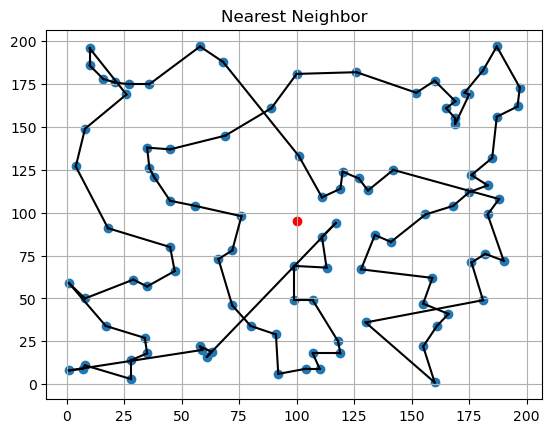

minimum lenght Actual (NN)= 1768.0
time cost to calculate minimum lenght using Modified NN = 0.001 seconds
Rleative error of NN method compared to MST= 22.9348 %


In [50]:
distNN, timecost7, visit7 = nearest_neighbor(D)
print(distNN)
connectpoints(x, y, visit7, 'Nearest Neighbor')
print('minimum lenght Actual (NN)=', distNN)
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(distNN-min_path)/distNN))
print('time cost to calculate minimum lenght using Modified NN = %.3f seconds' %(timecost7))
print('Rleative error of NN method compared to MST= %.4f %%'%(100*(distNN-calculate_min_spanning_tree_length(x, y))/distNN))


# Modification 1: Opt(N2N & Off center)

minimum lenght (NN)= 1780.0
time cost to calculate minimum lenght using Modified NN = 0.018 seconds
Rleative error of NN method compared to MST= 23.4543 %


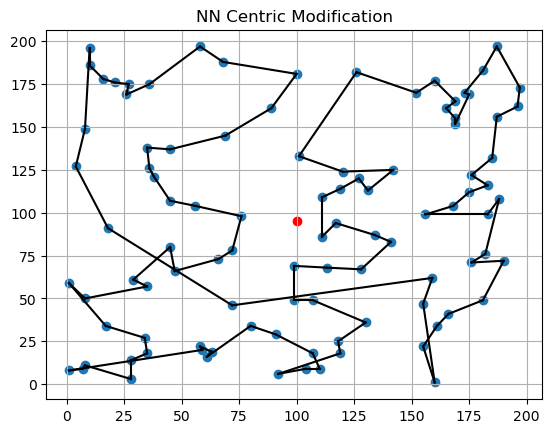

In [51]:
distanceNNcent , timecost4, visit = NearestN_centric(x, y)
print('minimum lenght (NN)=', distanceNNcent)
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(distanceNNcent-min_path)/distanceNNcent))
print('time cost to calculate minimum lenght using Modified NN = %.3f seconds' %(timecost4))
print('Rleative error of NN method compared to MST= %.4f %%'%(100*(distanceNNcent-calculate_min_spanning_tree_length(x, y))/distanceNNcent))
connectpoints(x, y, visit, 'NN Centric Modification')

# Second modification to the NN Algorithm.

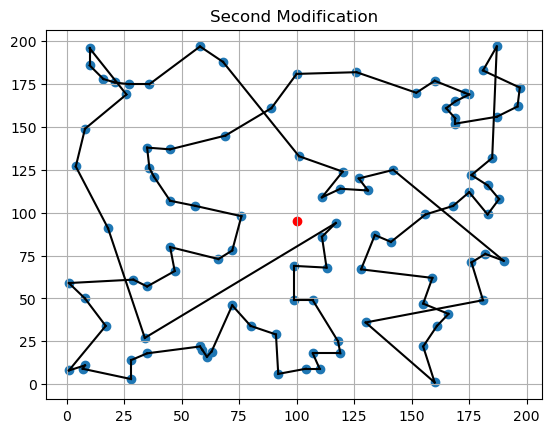

minimum lenght Actual (NN)= 1840.0
time cost to calculate minimum lenght using Modified NN = 0.018 seconds
Rleative error of NN method compared to MST= 25.9503 %


In [52]:
distNN_mod, timecost7, visit7 = nearest_neighbor_mod(D)
connectpoints(x, y, visit7, 'Second Modification')
print('minimum lenght Actual (NN)=', distNN_mod)
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(distNN_mod-min_path)/distNN_mod))
print('time cost to calculate minimum lenght using Modified NN = %.3f seconds' %(timecost7))
print('Rleative error of NN method compared to MST= %.4f %%'%(100*(distNN_mod-calculate_min_spanning_tree_length(x, y))/distNN_mod))


# Christofides Algorithm

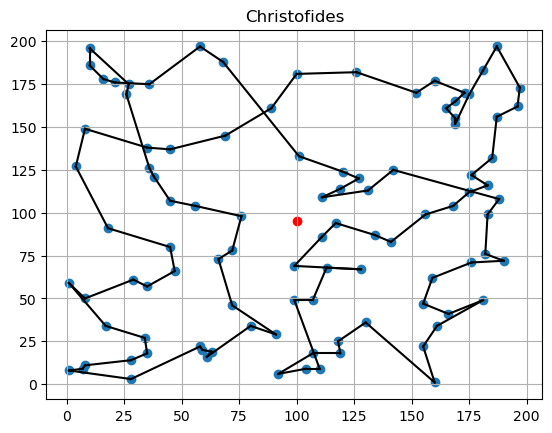

time cost to calculate minimum lenght using Christofides = 0.262 seconds
Christofides minimum length =  1739.0
Rleative error of Christofides method compared to MST= 21.6496 %


In [53]:
distCrhist, timecost, tour = Christofides(x, y)
connectpoints(x, y, tour, 'Christofides')
savef(tour, 'christ.txt')
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(distNN-min_path)/distNN))
print('time cost to calculate minimum lenght using Christofides = %.3f seconds' %(timecost))
print('Christofides minimum length = ', distCrhist)
print('Rleative error of Christofides method compared to MST= %.4f %%'%(100*(distCrhist-calculate_min_spanning_tree_length(x, y))/distCrhist))

# Anealing Algorithm:

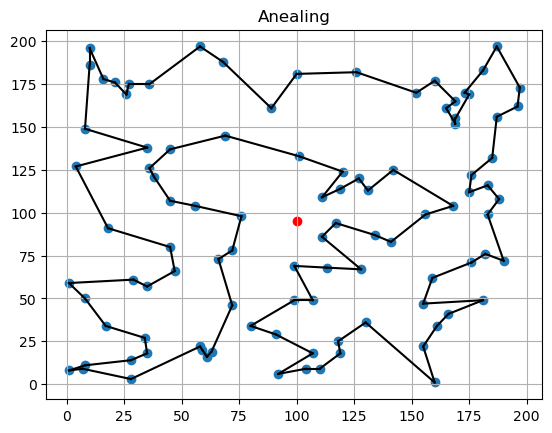

minimum lenght (NN)= 1646.0
time cost to calculate minimum lenght using Modified NN = 2.402 seconds
Rleative error of NN method compared to MST= 17.2227 %


In [54]:
from nodes_generator import NodeGenerator
from simulated_annealing import SimulatedAnnealing


# #def main(v):
# '''set the simulated annealing algorithm params'''
# temp = 1
# stopping_temp = 0.00000001
# alpha = 0.9995
# stopping_iter = 10000000

# '''set the dimensions of the grid'''
# size_width = 200
# size_height = 200

# '''set the number of nodes'''
# population_size = v

# '''generate random list of nodes'''
# nodes = NodeGenerator(size_width, size_height, population_size).generate()

# '''run simulated annealing algorithm with 2-opt'''
# sa = SimulatedAnnealing(nodes, temp, alpha, stopping_temp, stopping_iter)
# sa.anneal()

# '''animate'''
# sa.animateSolutions()


# '''show the improvement over time'''
# sa.plotLearning()


# if __name__ == "__main__":
#     main(v+1)
temp = 10
stopping_temp = 0.00000001
alpha = 0.9995
stopping_iter = 10000000
size_width = 200
size_height = 200

nodes, e = NodeGenerator(size_width, size_height).generate()
sa = SimulatedAnnealing(nodes, temp, alpha, stopping_temp, stopping_iter)
tour = sa.anneal()
sa.savefiles()
ys=readanealing('aneal.txt')
dist_aneal = DistTour(tour)
timecost_aneal = float(ys[1])
connectpoints(x, y, tour, 'Anealing')
print('minimum lenght (NN)=', dist_aneal)
if v<14:
    print('Rleative error of NN method = %.1f %%'%(100*(dist_aneal-min_path)/dist_aneal))
print('time cost to calculate minimum lenght using Modified NN = %.3f seconds' %(timecost_aneal))
print('Rleative error of NN method compared to MST= %.4f %%'%(100*(dist_aneal-calculate_min_spanning_tree_length(x, y))/dist_aneal))

# Comparing the Error and time of different methods (takes 4 hours to compute)

In [17]:
#Some parametesrs for anealing algorithm
import os
import time
t1 = time.time() 

#Parameters for the Anealing method
temp = 10
stopping_temp = 0.00000001
alpha = 0.9995
stopping_iter = 10000000
size_width = 200
size_height = 200
#Importing important Anealing Algorithm files. They have to be stored in the same repositry. 
from nodes_generator import NodeGenerator
from simulated_annealing import SimulatedAnnealing


#S1 and list seed are going to be used to seed the RNG
S1=31417
seed = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 65, 70, 75, 80, 85, 90, 95, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 400, 600, 800, 1000]

n=50 #Number of trials to average on:
m=len(seed)
#Define empty error arrays, over each row the number of verticies are the same, the iteration number is the same on the same column
NN = np.zeros((m, n))
NNcent = np.zeros((m, n))
NNmod = np.zeros((m, n))
christ = np.zeros((m, n))
aneal = np.zeros((m, n))
#Time matrecies
t_NN = np.zeros((m, n))
t_NNcent = np.zeros((m, n))
t_NNmod = np.zeros((m, n))
t_christ = np.zeros((m, n))
t_aneal = np.zeros((m, n))

for j in range(n):
    c=0
    for i in seed:
        v=i
        population_size = v
        x=[]
        y=[]
        np.random.seed((j+1)*S1+i)
        x=list((np.random.randint(200, size=v)))
        np.random.seed((j+1)*S1-i+1)
        y=list((np.random.randint(200, size =v)))
        #Saving x and y into files
        savex(x)
        savey(y)
        #Evaluating distances matrix
        D = Distances_Matrix(x,y)
        #finding the centroid
        x_bar = np.average(x)
        y_bar = np.average(y)
        #evaluateing distances_to_centroid list
        dcent = Dist_to_center(x,y, x_bar, y_bar)
        #finding the index of the farthest point to the centroid
        m=dcent.index(max(dcent))
        #Minspaning tree
        min_spanning_tree_length , timecost2, G, T= calculate_min_spanning_tree_length2(x, y)
    
        ## NN 
        distNN, timecost1, visit7 = nearest_neighbor(D)
        # Centric
        distanceNNcent , timecost2, visit = NearestN_centric(x, y)
        # NN_mod
        distNN_mod, timecost3, visit7 = nearest_neighbor_mod(D)
        #Christ
        distCrhist, timecost4, tour3 = Christofides(x, y)
        savef(tour3, 'christ.txt')
        
        #Aneal
        nodes, e = NodeGenerator(size_width, size_height).generate()
        sa = SimulatedAnnealing(nodes, temp, alpha, stopping_temp, stopping_iter)
        tour = sa.anneal()
        sa.savefiles()
        ys=readanealing('aneal.txt')
        dist_aneal = DistTour(tour)
        timecost_aneal = float(ys[1])
        
        
        #Assigning values to elements of the matricies
        NN[c, j] = distNN/min_spanning_tree_length 
        NNcent[c, j] = distanceNNcent/min_spanning_tree_length
        NNmod[c, j] = distNN_mod/min_spanning_tree_length
        christ[c, j] = distCrhist/min_spanning_tree_length
        aneal[c, j] = dist_aneal/min_spanning_tree_length
        #Time matrecies
        t_NN[c, j] = timecost1
        t_NNcent[c, j] = timecost2
        t_NNmod[c, j] = timecost3
        t_christ[c, j] = timecost4
        t_aneal[c, j] = timecost_aneal
        plt.close('all')
        c+=1
t2 = time.time()

# Defining lists, where each element is the average of n trials of eaither error or time

In [26]:
NNlist  = []
NNcentlist = []
NNmodlist =[]
christlist =[]
aneallist=[]
t_NNlist  = []
t_NNcentlist = []
t_NNmodlist =[]
t_christlist =[]
t_aneallist=[]
for i in range(len(seed)):
    NNlist.append(np.sum(NN[i,:])/np.count_nonzero(NN[i,:])) #I am using this way to find the average because sometimes the 
    #anealing code does not work... I do not know why. Maybe because I create a lot of files and read from them, that might be 
    # a reason.
    NNcentlist.append(np.sum(NNcent[i,:])/np.count_nonzero(NNcent[i,:]))
    NNmodlist.append(np.sum(NNmod[i,:])/np.count_nonzero(NNmod[i,:]))
    christlist.append(np.sum(christ[i,:])/np.count_nonzero(christ[i,:]))
    aneallist.append(np.sum(aneal[i,:])/np.count_nonzero(aneal[i,:]))
    t_NNlist.append(np.sum(t_NN[i,:])/np.count_nonzero(t_NN[i,:]))
    t_NNcentlist.append(np.sum(t_NNcent[i,:])/np.count_nonzero(t_NNcent[i,:]))
    t_NNmodlist.append(np.sum(t_NNmod[i,:])/np.count_nonzero(t_NNmod[i,:]))
    t_christlist.append(np.sum(t_christ[i,:])/np.count_nonzero(t_christ[i,:]))
    t_aneallist.append(np.sum(t_aneal[i,:])/np.count_nonzero(t_aneal[i,:]))
    

C:\Users\ahmed\AppData\Local\Temp\ipykernel_2632\2204157219.py:18: RuntimeWarning: invalid value encountered in scalar divide
  t_NNcentlist.append(np.sum(t_NNcent[i,:])/np.count_nonzero(t_NNcent[i,:]))


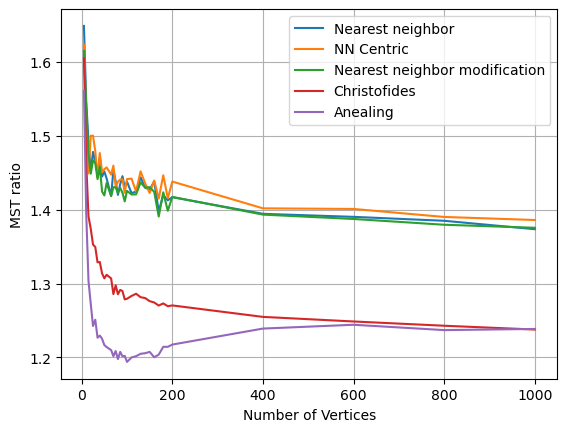

In [27]:
plt.figure()
plt.plot(seed, NNlist, label = 'Nearest neighbor')
plt.plot(seed, NNcentlist, label = 'NN Centric')
plt.plot(seed, NNmodlist, label = 'Nearest neighbor modification')
plt.plot(seed, christlist, label = 'Christofides')
plt.plot(seed, aneallist, label = 'Anealing')
plt.xlabel('Number of Vertices')
plt.ylabel('MST ratio')
plt.grid()
plt.legend()
plt.show()

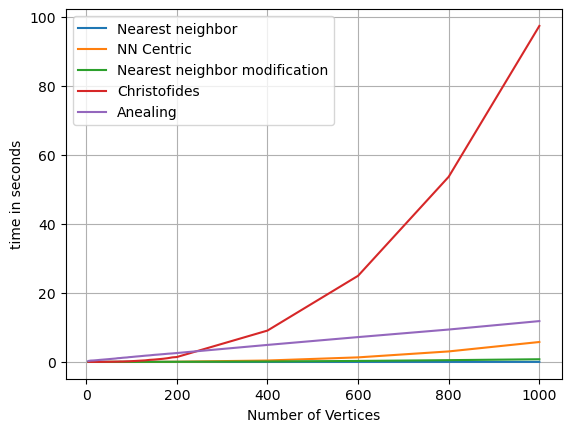

In [20]:
plt.figure()
plt.plot(seed, t_NNlist, label = 'Nearest neighbor')
plt.plot(seed, t_NNcentlist, label = 'NN Centric')
plt.plot(seed, t_NNmodlist, label = 'Nearest neighbor modification')
plt.plot(seed, t_christlist, label = 'Christofides')
plt.plot(seed, t_aneallist, label = 'Anealing')
plt.xlabel('Number of Vertices')
plt.ylabel('time in seconds')
plt.grid()
plt.legend()
plt.show()